In [1]:
!pip install geopandas pandas matplotlib

  Using cached matplotlib-3.10.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.2-cp313-cp313-macosx_10_13_universal2.whl.metadata (106 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.2.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (8.9 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp313-cp313-macosx_11_0_arm64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp313-cp313-macosx_11_0_arm64.whl (255 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.58.2-cp313-cp313-macosx_10_13_universal2.whl (2.7 MB)
Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl (65 kB)
Using cached pillow-11.2.1-cp313-cp313-macosx_11_0_arm64.whl (3.0 MB)
Using cached pyparsing-3.2.3

In [ ]:
!pip install openpyxl

In [10]:
import geopandas
import zipfile
import os
import matplotlib.pyplot as plt # Often useful for customization
import pandas as pd

geopackage_path = "output/all.gpkg"
#table_path = 'data/testdataset.csv'
# Similar to shapefiles, adjust the path if your zip contains multiple layers or folders.
# If your GeoPackage has multiple layers, you might need to specify the layer:
# gdf_gpkg = geopandas.read_file(geopackage_path, layer='my_specific_layer')

gdf = geopandas.read_file(geopackage_path)
#df = pd.read_csv(table_path, sep=';', decimal=',')



In [6]:
#gdf['AGS'] = df['AGS'].astype(str)
print(gdf.dtypes)



id             int64
lon          float64
lat          float64
amenity       object
name          object
geometry    geometry
dtype: object


In [ ]:
df = df.rename(columns={'ID': 'AGS'})
df['AGS'] = df['AGS'].astype(str)

print(df.dtypes)


In [ ]:
gdf = gdf.merge(df, on='AGS', how='left')

In [ ]:
import matplotlib.pyplot as plt
import geopandas # Assuming joined_data is already a GeoDataFrame

gdf.plot(figsize=(10, 10)) # Adjust figsize as needed
plt.title("Map of Joined Administrative Areas")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [ ]:
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))

    # Plot the data, coloring by the 'Population' column
    # 'cmap' (colormap) visualizes numerical values. 'viridis' is a good default.
    # 'legend=True' displays a color bar.
    joined_data.plot(column='preis_miet_best',
                     cmap='viridis',
                     legend=True,
                     edgecolor='black', # Add black borders for clarity
                     linewidth=0.5,
                     ax=ax) # Pass the axes object

    ax.set_title("Administrative Areas by Population")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    plt.show()


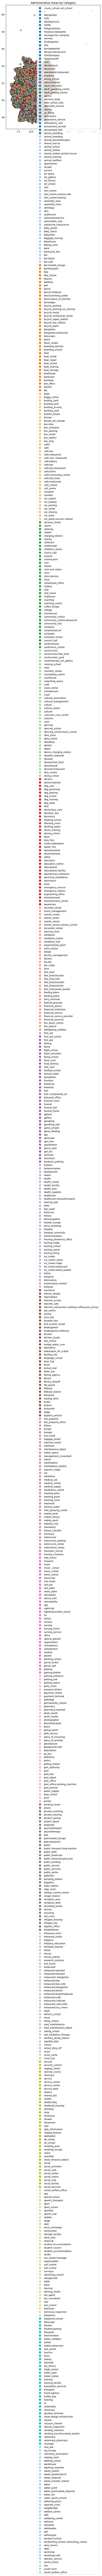

In [11]:
gdf.plot(column='amenity',
                    figsize=(10, 10),
                    legend=True,
                    edgecolor='black',
                    linewidth=0.5,
                    cmap='tab20') # 'tab20' is a good categorical colormap
plt.title("Administrative Areas by Category")
plt.show()